In [1]:
from util import *
from dnc_lstm import DNC
from dnc_ff import DNCFF
from autograd import grad
from autograd.misc.optimizers import rmsprop, adam

In [2]:
def seq(seq_len, seq_width):
    """
    Implements the copy task - section 4.1 from the NTM paper.
    Returns inputs, outputs, and a mask for loss calculation
    """
    rand_tile = np.random.randint(2, size=(seq_len, seq_width))
    inputs = np.zeros((seq_len*2+3, seq_width+2))
    inputs[0,1] = 1
    inputs[seq_len+1,0] = 1
    inputs[1:seq_len+1, 2:] = rand_tile
    targets = np.zeros((seq_len*2+3, seq_width+1))
    targets[-1,0] = 1
    targets[seq_len+2:-1, 1:] = rand_tile
    mask = np.zeros((seq_len*2+3, seq_width+1))
    mask[seq_len+2:,:] = 1
    return inputs, targets, mask

inputs, targets, mask = seq(4, 4)
print inputs
print targets
print mask

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  1.]
 [ 0.  0.  1.  1.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  1.  0.  1.]
 [ 0.  1.  1.  1.  0.]
 [ 1.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


Training DNC...
('Iteration', 0, 'Train loss:', <autograd.numpy.numpy_boxes.ArrayBox object at 0x7f6e1621a170>)
Test loss:  Autograd ArrayBox with value 0.31511730264
Target


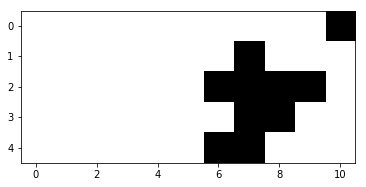

Predicted


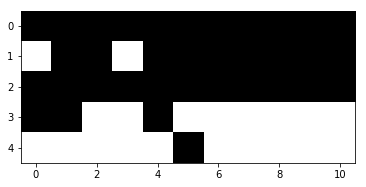

L
Autograd ArrayBox with value [[ 0.          0.04627539  0.04398501  0.04785043  0.05517546  0.04805001
   0.04461568  0.04695501  0.04736085  0.04397831]
 [ 0.04786214  0.          0.05058054  0.04560393  0.04958737  0.05055992
   0.04563207  0.05116874  0.05070136  0.04897315]
 [ 0.04919458  0.05067539  0.          0.05646353  0.04998142  0.05132344
   0.04949457  0.05247725  0.04981808  0.04840367]
 [ 0.050237    0.04850522  0.04416113  0.          0.04550983  0.0524474
   0.04784913  0.05674674  0.05617219  0.05539358]
 [ 0.04811433  0.04542587  0.03947536  0.04352135  0.          0.0540364
   0.04503893  0.04745483  0.04573741  0.04653125]
 [ 0.04693827  0.05139967  0.04151614  0.05504193  0.04564394  0.
   0.04607285  0.04844914  0.05121135  0.04995668]
 [ 0.05053517  0.05695921  0.0443789   0.05356416  0.05020516  0.04919759
   0.          0.0538657   0.04788332  0.04752876]
 [ 0.05413898  0.04700747  0.04146179  0.04864673  0.04753735  0.05192229
   0.05026775  0.          0.0

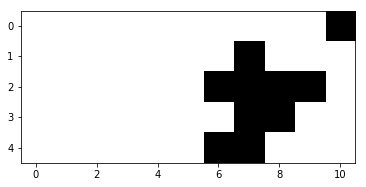

Predicted


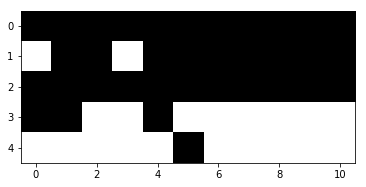

L
Autograd ArrayBox with value [[ 0.          0.05001633  0.05043933  0.05028224  0.04990173  0.05086945
   0.05134454  0.05215897  0.04682668  0.05252058]
 [ 0.05163731  0.          0.04627043  0.05349905  0.04819777  0.04863332
   0.05030198  0.04968739  0.04485105  0.04957616]
 [ 0.04846908  0.05174162  0.          0.0502992   0.04753069  0.05022957
   0.05191058  0.04618623  0.04735664  0.04857307]
 [ 0.04760544  0.05000783  0.04947459  0.          0.0488949   0.05106175
   0.05262998  0.05115113  0.04662646  0.04982826]
 [ 0.04854525  0.05144593  0.0489957   0.04906381  0.          0.05021149
   0.04995934  0.04729724  0.04534149  0.04806689]
 [ 0.04922232  0.04951452  0.05058844  0.05291571  0.04932071  0.
   0.05315279  0.04775295  0.04696046  0.05173684]
 [ 0.05098531  0.04949161  0.04908074  0.05457267  0.0540705   0.04871619
   0.          0.04940076  0.04644884  0.04999802]
 [ 0.04903471  0.05215956  0.05627768  0.05091745  0.05026055  0.04995088
   0.05246085  0.          0

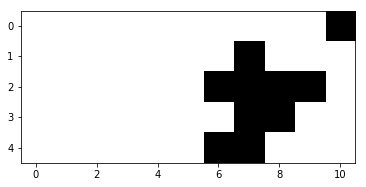

Predicted


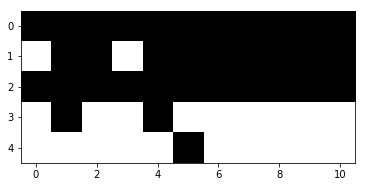

L
Autograd ArrayBox with value [[ 0.          0.04799222  0.04707563  0.04965104  0.05107815  0.0491467
   0.04490303  0.05248667  0.0508193   0.05119029]
 [ 0.05260605  0.          0.04794366  0.05180728  0.04844783  0.0519493
   0.04677877  0.05011675  0.0523027   0.05019691]
 [ 0.05110867  0.05026028  0.          0.053998    0.05208475  0.05139777
   0.04620959  0.04937389  0.05148623  0.05156541]
 [ 0.05252097  0.05300174  0.04912585  0.          0.0478444   0.05392867
   0.04891647  0.05156582  0.05704121  0.05160656]
 [ 0.04993738  0.0483918   0.04604112  0.05260716  0.          0.05403148
   0.04618384  0.04625225  0.05280325  0.04839007]
 [ 0.05308678  0.04935435  0.0469654   0.04923437  0.04877023  0.
   0.04946855  0.05160657  0.0505415   0.05021489]
 [ 0.051948    0.05186092  0.05062663  0.05490455  0.05427638  0.05227242
   0.          0.05161825  0.05395624  0.05393617]
 [ 0.05146292  0.05204484  0.04900786  0.0519256   0.05312917  0.05142451
   0.04530176  0.          0.0

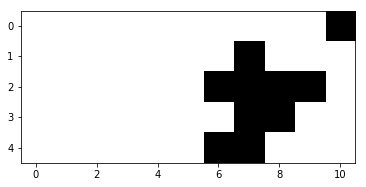

Predicted


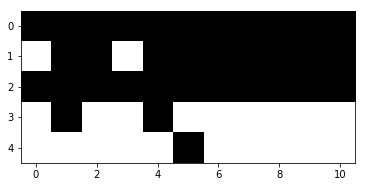

L
Autograd ArrayBox with value [[ 0.          0.04908468  0.04950588  0.04940447  0.0496747   0.0507475
   0.04550981  0.04987827  0.05246602  0.04968691]
 [ 0.05721439  0.          0.05019916  0.05554631  0.04823863  0.05231769
   0.04809594  0.05007086  0.05069291  0.05128748]
 [ 0.05097398  0.04900191  0.          0.05307689  0.04732184  0.05069923
   0.04811519  0.04781355  0.05025608  0.04997644]
 [ 0.05075586  0.05171182  0.04986084  0.          0.04941402  0.04866103
   0.04584702  0.05151177  0.0531694   0.04987694]
 [ 0.04967745  0.0532145   0.05104811  0.05102506  0.          0.05122471
   0.04564175  0.05126633  0.05111186  0.0497844 ]
 [ 0.04941296  0.04950271  0.04994383  0.05522164  0.04744282  0.
   0.0465417   0.04779018  0.05186634  0.04977545]
 [ 0.0525315   0.05697493  0.05421314  0.05477596  0.04890376  0.05203211
   0.          0.05063394  0.05241301  0.05233867]
 [ 0.05059683  0.05025355  0.04974269  0.05311053  0.04694826  0.05468932
   0.04831072  0.          0.

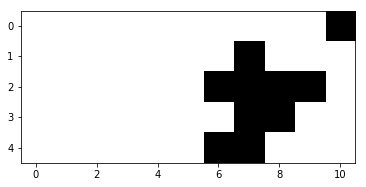

Predicted


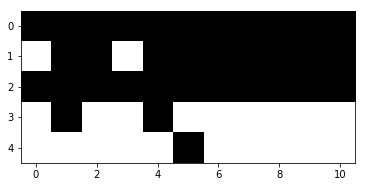

L
Autograd ArrayBox with value [[ 0.          0.0506324   0.04480921  0.05367404  0.05143455  0.05233022
   0.05070428  0.04915225  0.05091796  0.05220039]
 [ 0.05092281  0.          0.04547461  0.0516441   0.04906825  0.05011705
   0.04865134  0.04666239  0.05373087  0.05049196]
 [ 0.05149344  0.05573298  0.          0.05356923  0.05114715  0.05253877
   0.05370795  0.05029084  0.05040112  0.05458446]
 [ 0.04760051  0.04823166  0.0463255   0.          0.04918076  0.05434761
   0.04932612  0.04778395  0.04933182  0.05167378]
 [ 0.04923359  0.05054497  0.04701399  0.04822954  0.          0.05413603
   0.05128017  0.04793647  0.05141729  0.05053087]
 [ 0.05131704  0.04944274  0.05032807  0.04897946  0.04912667  0.
   0.04934951  0.04764013  0.05522003  0.05057799]
 [ 0.04803909  0.05144111  0.04541289  0.05089926  0.05002038  0.05260176
   0.          0.04826097  0.05154192  0.04751955]
 [ 0.05051783  0.04967414  0.04729182  0.05222264  0.05006971  0.0524051
   0.05197105  0.          0.

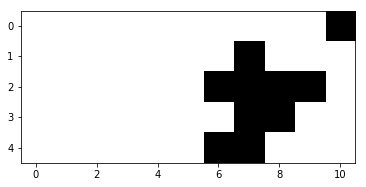

Predicted


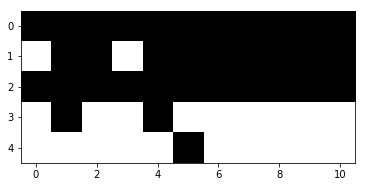

L
Autograd ArrayBox with value [[ 0.          0.05115111  0.05122517  0.04816209  0.0484973   0.04908026
   0.04900553  0.04504964  0.05076379  0.04909428]
 [ 0.05034279  0.          0.05250775  0.05066925  0.0497826   0.04874258
   0.05155946  0.04796708  0.05123114  0.04804749]
 [ 0.04913982  0.04960423  0.          0.04936555  0.04997172  0.05020866
   0.04905734  0.04951953  0.05502632  0.04824992]
 [ 0.05133464  0.05085025  0.0593148   0.          0.04998674  0.04950204
   0.05231709  0.04788032  0.05233711  0.05004758]
 [ 0.05151785  0.04891483  0.05117134  0.05266426  0.          0.05042996
   0.05005485  0.05001005  0.05023065  0.0490899 ]
 [ 0.04834035  0.04947278  0.05284512  0.051422    0.04875859  0.
   0.05271185  0.04399431  0.05027052  0.04886014]
 [ 0.04856427  0.04823069  0.04877721  0.04762042  0.05130503  0.04780954
   0.          0.04722976  0.05173301  0.04586675]
 [ 0.05374582  0.05345626  0.05308483  0.05657133  0.05101959  0.05801548
   0.05113908  0.          0

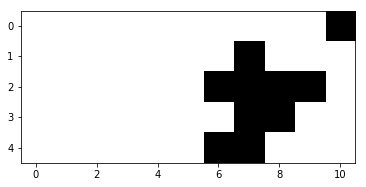

Predicted


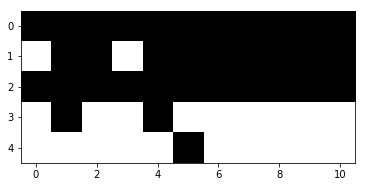

L
Autograd ArrayBox with value [[ 0.          0.05047146  0.04709502  0.05035051  0.04783324  0.05240352
   0.05119833  0.04947041  0.05092062  0.04678482]
 [ 0.05104204  0.          0.04880925  0.04996681  0.05045657  0.04901671
   0.04874431  0.04900323  0.05136409  0.04573234]
 [ 0.05301183  0.05069516  0.          0.05255615  0.0541161   0.05191013
   0.05040317  0.05184671  0.05039053  0.04710258]
 [ 0.0473357   0.05051973  0.04822809  0.          0.05083936  0.0513485
   0.04876337  0.04792562  0.05057478  0.04757938]
 [ 0.04879654  0.05332594  0.04923918  0.04917834  0.          0.0576181
   0.05237639  0.04918981  0.05312529  0.04756268]
 [ 0.04984486  0.04991083  0.04936549  0.05049494  0.04791658  0.
   0.0481719   0.04940207  0.05631579  0.045219  ]
 [ 0.0487801   0.05039551  0.04792185  0.05022367  0.05072618  0.05133306
   0.          0.05004395  0.0512875   0.04787746]
 [ 0.05040103  0.05049137  0.04897935  0.05044821  0.05451878  0.05162305
   0.04916196  0.          0.0

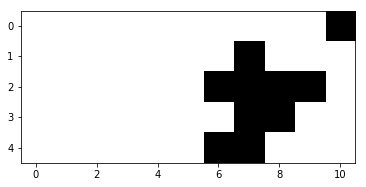

Predicted


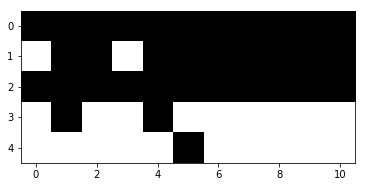

L
Autograd ArrayBox with value [[ 0.          0.04915619  0.04785345  0.04692017  0.04690539  0.05366088
   0.04937162  0.05032403  0.04895028  0.05324974]
 [ 0.0494297   0.          0.04933174  0.05053923  0.04870945  0.05600086
   0.05225499  0.05241336  0.0494707   0.05257176]
 [ 0.05027488  0.05154223  0.          0.04841714  0.05038529  0.05243126
   0.05099889  0.04948339  0.05084264  0.05090443]
 [ 0.05461826  0.05584309  0.05139937  0.          0.0488502   0.05325066
   0.05384463  0.05297153  0.05266839  0.05413709]
 [ 0.05446244  0.05288197  0.05001734  0.04723939  0.          0.05153537
   0.05021306  0.04968015  0.05039498  0.05089874]
 [ 0.04965661  0.04977949  0.05201299  0.04600965  0.04781037  0.
   0.04991272  0.05394961  0.05020111  0.04990223]
 [ 0.05013724  0.04909574  0.04792176  0.04579501  0.04740761  0.05192778
   0.          0.05007325  0.05226989  0.05072883]
 [ 0.05035621  0.04990113  0.04943966  0.04576917  0.05089216  0.05141992
   0.0542333   0.          0

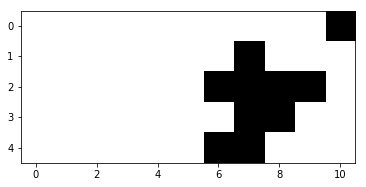

Predicted


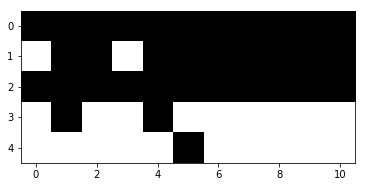

L
Autograd ArrayBox with value [[ 0.          0.05333364  0.05290137  0.05225573  0.04924104  0.04951822
   0.051628    0.05622261  0.0540418   0.05462988]
 [ 0.0472587   0.          0.04946372  0.05573582  0.04718352  0.05362655
   0.05139709  0.04957537  0.04797087  0.04957609]
 [ 0.04744345  0.05189262  0.          0.0524376   0.0469964   0.04823119
   0.0479559   0.04889064  0.04811359  0.04914482]
 [ 0.04998424  0.05051024  0.04895243  0.          0.04895228  0.04700749
   0.05126113  0.05047669  0.05100542  0.05059481]
 [ 0.04678496  0.04994984  0.04996379  0.05188811  0.          0.04814453
   0.04849661  0.05071441  0.05298486  0.04968967]
 [ 0.04785066  0.05170136  0.05100358  0.05078078  0.0519303   0.
   0.05087465  0.05375113  0.05185509  0.05350159]
 [ 0.0455179   0.05201438  0.05218337  0.05161239  0.04908438  0.04693282
   0.          0.05034916  0.05168304  0.05118256]
 [ 0.04741217  0.05577173  0.0546527   0.05171903  0.05076206  0.04918497
   0.05163319  0.          0

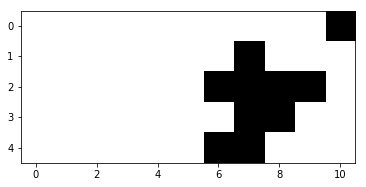

Predicted


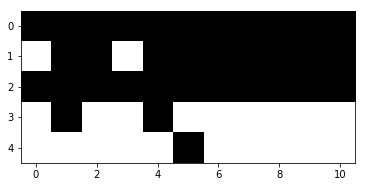

L
Autograd ArrayBox with value [[ 0.          0.05118498  0.05255986  0.05347618  0.05003622  0.05224458
   0.05067477  0.05391135  0.04682472  0.05007545]
 [ 0.04823826  0.          0.04976579  0.04976981  0.04890072  0.05086962
   0.04952297  0.04954304  0.04608456  0.05219276]
 [ 0.04702713  0.04962329  0.          0.05224549  0.04889058  0.05073172
   0.04637462  0.04902238  0.04978904  0.05171746]
 [ 0.05106821  0.05052139  0.05017417  0.          0.04945484  0.04974719
   0.05080502  0.04957324  0.04639174  0.05408573]
 [ 0.04822159  0.05013156  0.049721    0.05169457  0.          0.04959741
   0.05101817  0.05110194  0.04829266  0.05109025]
 [ 0.04747507  0.04995397  0.04870044  0.05149046  0.05092853  0.
   0.04843461  0.04847376  0.04676609  0.05018352]
 [ 0.04874797  0.0503024   0.05478403  0.05199724  0.05134303  0.04959343
   0.          0.05238417  0.04779075  0.0489025 ]
 [ 0.04853551  0.05391687  0.04845595  0.05650356  0.0505479   0.05147364
   0.05017609  0.          0

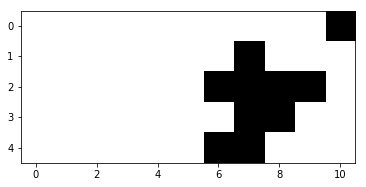

Predicted


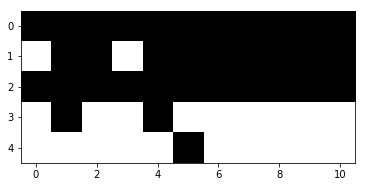

L
Autograd ArrayBox with value [[ 0.          0.05479949  0.05147382  0.05471088  0.05141463  0.05300987
   0.05399928  0.05464369  0.05047912  0.04866451]
 [ 0.04514879  0.          0.05056863  0.04919959  0.04910165  0.04949246
   0.05109616  0.05133873  0.04928676  0.04751156]
 [ 0.04617183  0.04926893  0.          0.05050249  0.05042301  0.04930464
   0.04900459  0.04741853  0.05106738  0.04783902]
 [ 0.04837509  0.04972311  0.05240046  0.          0.05043843  0.05088504
   0.05659371  0.04891071  0.05468371  0.0492272 ]
 [ 0.04618821  0.05083065  0.05206819  0.05144835  0.          0.04922746
   0.05230108  0.05412832  0.05136465  0.04920774]
 [ 0.04680187  0.05065022  0.05189488  0.05044005  0.0488034   0.
   0.05079655  0.05188761  0.05142962  0.04775966]
 [ 0.04755742  0.05037874  0.05159805  0.04853578  0.04960658  0.04916907
   0.          0.05127435  0.05409668  0.04708278]
 [ 0.04686411  0.04880717  0.05029125  0.0527922   0.04978143  0.05012005
   0.05319187  0.          0

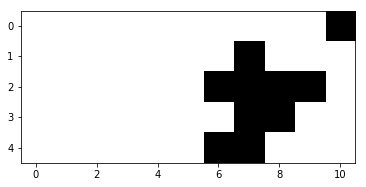

Predicted


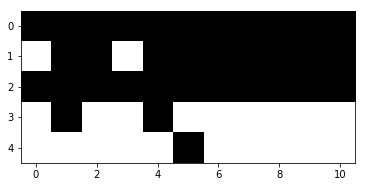

L
Autograd ArrayBox with value [[ 0.          0.05434978  0.05719101  0.05293666  0.04935687  0.05298268
   0.05362888  0.05295414  0.05049691  0.05254978]
 [ 0.04603219  0.          0.04919843  0.05361199  0.04774303  0.05414172
   0.05003928  0.04957335  0.05079118  0.04715339]
 [ 0.0491698   0.05504784  0.          0.05228178  0.04853329  0.0506585
   0.05117003  0.05368407  0.0512727   0.0490671 ]
 [ 0.04603542  0.04981927  0.04990866  0.          0.04721387  0.04867877
   0.05239095  0.05021     0.05185677  0.05079016]
 [ 0.04755806  0.05254192  0.05373595  0.05207067  0.          0.05133149
   0.05157285  0.05012029  0.04904586  0.05169608]
 [ 0.04653003  0.05101246  0.05022522  0.05020681  0.04936444  0.
   0.05061325  0.05316125  0.05236029  0.04975696]
 [ 0.04728144  0.05091071  0.04896573  0.05090669  0.04802508  0.04924805
   0.          0.04960581  0.04962366  0.04895844]
 [ 0.04657817  0.05011196  0.04940552  0.05247176  0.04761734  0.04898758
   0.04873122  0.          0.

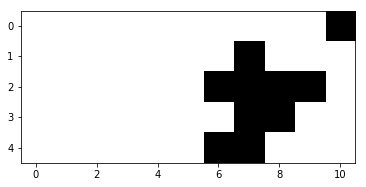

Predicted


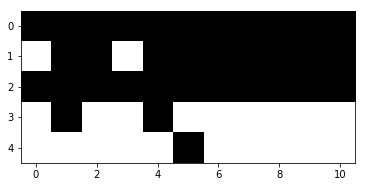

L
Autograd ArrayBox with value [[ 0.          0.04987936  0.04717522  0.04952383  0.0545122   0.0524738
   0.05032344  0.04768419  0.05190634  0.05225367]
 [ 0.0492821   0.          0.04662042  0.04820648  0.04970678  0.04861946
   0.04979933  0.04740758  0.05007031  0.05030605]
 [ 0.05045313  0.0516299   0.          0.05207653  0.05323887  0.05886701
   0.05163864  0.05139047  0.05367024  0.05249337]
 [ 0.05157578  0.04944008  0.04923048  0.          0.0507864   0.05107693
   0.05120396  0.04762942  0.05050785  0.05051904]
 [ 0.04880077  0.05065563  0.04672078  0.04908578  0.          0.04985774
   0.05348327  0.04557472  0.0491728   0.05146427]
 [ 0.05089305  0.05179344  0.04623108  0.05328944  0.05271524  0.
   0.0518445   0.04954939  0.05061446  0.05611518]
 [ 0.04765201  0.04941735  0.05020517  0.04971334  0.05014012  0.05007394
   0.          0.04705119  0.05204467  0.04996974]
 [ 0.04937148  0.05238134  0.04707295  0.05317195  0.05074458  0.05211097
   0.05185431  0.          0.

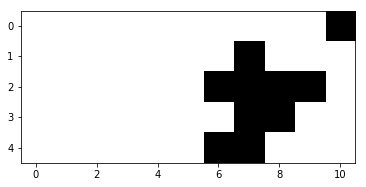

Predicted


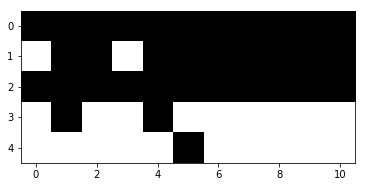

L
Autograd ArrayBox with value [[ 0.          0.04773218  0.04952391  0.0512477   0.04614356  0.0517169
   0.04857939  0.04986055  0.05149804  0.04717266]
 [ 0.05018428  0.          0.05192707  0.05311901  0.04640415  0.05288683
   0.05222574  0.05109793  0.05195305  0.04950015]
 [ 0.05084418  0.046326    0.          0.05062945  0.04587373  0.05113474
   0.0506862   0.04840787  0.05142972  0.05211062]
 [ 0.05066408  0.04838914  0.04939396  0.          0.048338    0.04822098
   0.04974465  0.05292994  0.05383738  0.05012941]
 [ 0.05357462  0.04927217  0.05029733  0.05334541  0.          0.05596855
   0.05177533  0.05136357  0.05422997  0.05388605]
 [ 0.04994622  0.04885103  0.05384918  0.04890916  0.0481401   0.
   0.05175215  0.05583941  0.05632203  0.04928378]
 [ 0.05205897  0.04872584  0.05181609  0.05090517  0.0463901   0.05063477
   0.          0.04981867  0.0524555   0.04894477]
 [ 0.04965115  0.04753997  0.05371958  0.04937995  0.04564846  0.0480142
   0.04856017  0.          0.0

KeyboardInterrupt: 

In [5]:
def loss_fn(pred, target, mask):
    pred = sigmoid(pred)
    one = np.ones_like(pred)
    epsilon = 1.e-10 # to prevent log(0)
    a = target * np.log(pred + epsilon)
    b = (one - target) * np.log(one - pred + epsilon)
    return np.mean(- (a + b) * mask)

seq_len, seq_wid = 4, 4
inputs, targets, mask = seq(seq_len, seq_wid)

dnc = DNCFF(input_size=seq_wid+2, output_size=seq_wid+1, hidden_size=32, R=1, N=10, W=4)
# dnc = DNC(input_size=12, output_size=10, hidden_size=10, R=1, N=10, W=1)
dnc_params = dnc._init_params()
# for k,v in dnc_params.items():
#     print k
#     print v.shape

def print_training_prediction(params):
    
#     inputs, targets, mask = seq(seq_len, seq_wid)
    result = []
    for t in range(inputs.shape[0]):
        out = dnc.step_forward(params, inputs[np.newaxis, t])
        result.append(out)
    result = np.concatenate(result, axis=0)
    loss = loss_fn(result, targets, mask)
    print "Test loss: ", loss
    print "Target"
    display(targets.T)
    print "Predicted"
    display(np.around(sigmoid(result._value), decimals=0).astype('int').T)
    print "L"
    print(dnc.accessor.states[-1]['L'])
    
def training_loss(params, iter):
#     inputs, targets, mask = seq(seq_len, seq_wid)
    result = []
    for t in range(inputs.shape[0]):
        out = dnc.step_forward(params, inputs[np.newaxis, t])
        result.append(out)
    result = np.concatenate(result, axis=0)
    return loss_fn(result, targets, mask)

def callback(weights, iter, gradient):
    if iter % 3 == 0:
        print("Iteration", iter, "Train loss:", training_loss(weights, 0))
        print_training_prediction(weights)

# Build gradient of loss function using autograd.
training_loss_grad = grad(training_loss)

print("Training DNC...")
# trained_params = adam(training_loss_grad, dnc_params, step_size=0.001,
#                       num_iters=1000, callback=callback)
trained_params = rmsprop(training_loss_grad, dnc_params, step_size=0.001,
                      num_iters=1000, callback=callback)

In [13]:
# Test simple ff network

xor_params = {
    'W_1':nprn(2,4),
    'W_2':nprn(4,1),
    'b_1':np.zeros((1,4)),
    'b_2':np.zeros((1,1)),
}

dataset = [[0,0],[0,1],[1,0],[1,1]]
dataset = np.array(dataset)
targets = np.array([0,1,1,0])

def feedforward(params, x_t):
    h_1 = np.dot(x_t, params['W_1']) + params['b_1']
    h_1 = sigmoid(h_1)
    o_1 = np.dot(h_1, params['W_2']) + params['b_2']
    o_1 = sigmoid(o_1)
    return o_1

def loss_fn(out, target):
    return np.sqrt(np.square(out-target))

def print_training_prediction(params):
    for row in dataset:
        out = feedforward(params, row[np.newaxis, :])
        print row, out

def training_loss(params, iter):
    loss = 0
    for idx, row in enumerate(dataset):
        out = feedforward(params, row[np.newaxis, :])
        loss = loss + loss_fn(out, targets[idx])
    return loss

def callback(weights, iter, gradient):
    if iter % 500 == 0:
        print("Iteration", iter, "Train loss:", training_loss(weights, 0))
        print_training_prediction(weights)

# Build gradient of loss function using autograd.
training_loss_grad = grad(training_loss)

print("Training XOR...")
# trained_params = adam(training_loss_grad, dnc_params, step_size=0.001,
#                       num_iters=1000, callback=callback)
trained_params = rmsprop(training_loss_grad, xor_params, step_size=0.001,
                      num_iters=10000, callback=callback)

Training XOR...
('Iteration', 0, 'Train loss:', array([[ 2.01487063]]))
[0 0] [[ 0.71557645]]
[0 1] [[ 0.60522889]]
[1 0] [[ 0.69249639]]
[1 1] [[ 0.59701946]]
('Iteration', 500, 'Train loss:', array([[ 1.96612337]]))
[0 0] [[ 0.79146216]]
[0 1] [[ 0.65700888]]
[1 0] [[ 0.7520248]]
[1 1] [[ 0.5836949]]
('Iteration', 1000, 'Train loss:', array([[ 1.83970027]]))
[0 0] [[ 0.89554105]]
[0 1] [[ 0.74378713]]
[1 0] [[ 0.80737705]]
[1 1] [[ 0.49532341]]
('Iteration', 1500, 'Train loss:', array([[ 1.63490696]]))
[0 0] [[ 0.94987146]]
[0 1] [[ 0.81457041]]
[1 0] [[ 0.85323575]]
[1 1] [[ 0.35284166]]
('Iteration', 2000, 'Train loss:', array([[ 1.4160493]]))
[0 0] [[ 0.97353951]]
[0 1] [[ 0.88597569]]
[1 0] [[ 0.89153614]]
[1 1] [[ 0.22002161]]
('Iteration', 2500, 'Train loss:', array([[ 1.2383719]]))
[0 0] [[ 0.98170177]]
[0 1] [[ 0.93012724]]
[1 0] [[ 0.93532511]]
[1 1] [[ 0.12212249]]
('Iteration', 3000, 'Train loss:', array([[ 1.11994352]]))
[0 0] [[ 0.98388553]]
[0 1] [[ 0.96007301]]
[1 0] [